<a href="https://colab.research.google.com/github/ShovalBenjer/Catering_Company_Management_System/blob/main/Marketing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

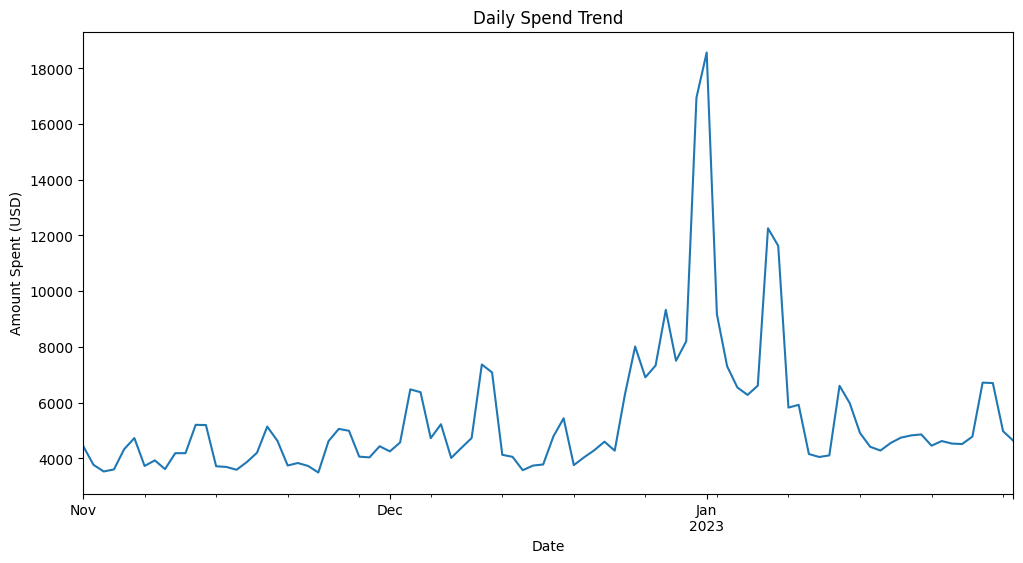

The best week was: 2022-11-27 00:00:00
CPM: Best week: 44.25, Overall: inf
CPC: Best week: 1.81, Overall: 1.62
Cost per purchase: Best week: 39.49, Overall: 45.56
Cost per checkout: Best week: 32.84, Overall: 41.52
Cost per add to cart: Best week: 28.06, Overall: 28.27
ROAS: Best week: 28.37, Overall: 12.60
AOV: Best week: 117.35, Overall: 118.77
Conversion rate: Best week: 0.09, Overall: 0.11

Campaign Performance (ROAS):
Campaign name
**Internal Campaign - PerfectA1 Testimonial Solicitation                      130.581481
ColdTraffic~US~ABO~A1~Test269~Testimonial Time cuts~18237                      40.276923
ColdTraffic~US~ABO~A1~NY2023.1                                                 29.510000
ColdTraffic~US~ABO~A1~Test283~Massage for tight skin (Images)~21040            24.200000
ColdTraffic~US~ABO~A1~Test274~Paloma informative split screen~20270            18.640000
ColdTraffic~US~ABO~A1~Test271~5 Pixels TB2~20468                               13.484615
ColdTraffic~WW~ABO~A1~NY2

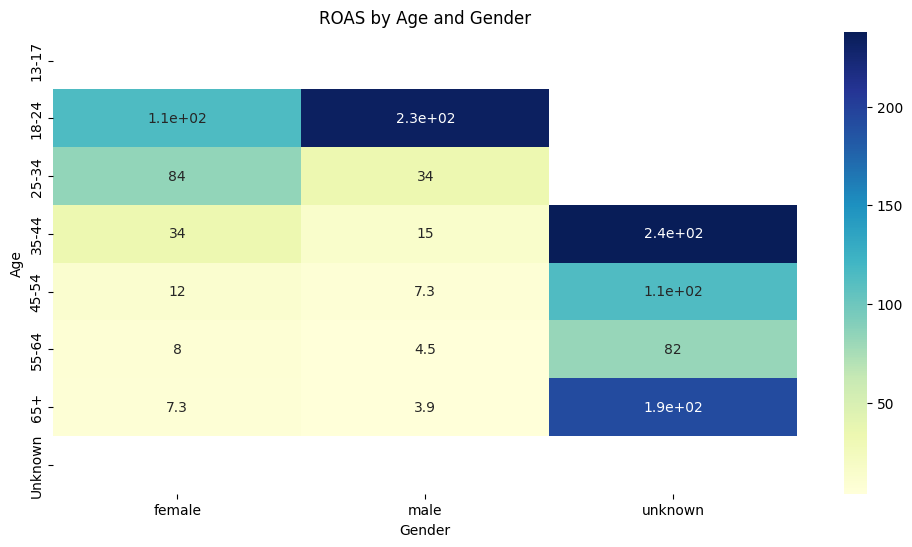

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define custom na_values
na_values = ['#DIV/0!', '#VALUE!']

# Define dtypes
dtypes = {
    'Reporting starts': str,
    'Reporting ends': str,
    'Date created': str,
    'Starts': str,
    'Ends': str,
    'Ad name': str,
    'Age': str,
    'Gender': str,
    'Campaign name': str,
    'Ad Set Name': str,
    'Ad set budget type': str,
    'Attribution setting': str,
    'Amount spent (USD)': float,
    'Reach': float,
    'Frequency': float,
    'Impressions': float,
    'Link clicks': float,
    'CPC': float,
    'CPM': float,
    'Landing page views': float,
    'Adds to cart': float,
    'Checkouts Initiated': float,
    'Purchases': float,
    'Purchases conversion value': float,
    'ROAS': float
}

# Read the CSV file
df = pd.read_csv('campaign_data.csv', dtype=dtypes, na_values=na_values, low_memory=False)

# Custom date parser function
def parse_date(date_str):
    if pd.isna(date_str) or date_str == 'continual':
        return pd.NaT
    try:
        return pd.to_datetime(date_str)
    except ValueError:
        return pd.NaT

# Convert date columns to datetime
date_columns = ['Reporting starts', 'Reporting ends', 'Date created', 'Starts', 'Ends']
for col in date_columns:
    df[col] = df[col].apply(parse_date)

# Set 'Reporting starts' as the index
df.set_index('Reporting starts', inplace=True)

# Calculate additional KPIs
df['CPM'] = df['Amount spent (USD)'] / df['Impressions'] * 1000
df['CPC'] = df['Amount spent (USD)'] / df['Link clicks']
df['Cost per purchase'] = df['Amount spent (USD)'] / df['Purchases']
df['Cost per checkout'] = df['Amount spent (USD)'] / df['Checkouts Initiated']
df['Cost per add to cart'] = df['Amount spent (USD)'] / df['Adds to cart']
df['AOV'] = df['Purchases conversion value'] / df['Purchases']
df['Conversion rate'] = df['Purchases'] / df['Link clicks']

# 1. Review account's trend
plt.figure(figsize=(12, 6))
df.resample('D')['Amount spent (USD)'].sum().plot()
plt.title('Daily Spend Trend')
plt.xlabel('Date')
plt.ylabel('Amount Spent (USD)')
plt.show()

# 1.1 Best period analysis
best_period = df.resample('W')['ROAS'].mean(numeric_only=True).idxmax()
print(f"The best week was: {best_period}")

# 1.2 KPI comparison for best period
best_week = df[df.index.to_period('W') == best_period.to_period('W')]
overall = df

kpis = ['CPM', 'CPC', 'Cost per purchase', 'Cost per checkout', 'Cost per add to cart', 'ROAS', 'AOV', 'Conversion rate']

for kpi in kpis:
    print(f"{kpi}: Best week: {best_week[kpi].mean(numeric_only=True):.2f}, Overall: {overall[kpi].mean(numeric_only=True):.2f}")

# 1.3 Campaign performance review
campaign_performance = df.groupby('Campaign name')['ROAS'].mean(numeric_only=True).sort_values(ascending=False)
print("\nCampaign Performance (ROAS):")
print(campaign_performance)

# 2. Audience breakdown
audience_breakdown = df.groupby(['Age', 'Gender'])[kpis].mean(numeric_only=True)
print("\nAudience Breakdown:")
print(audience_breakdown)

# 2.1 Target KPI calculation
target_kpis = ['CPC', 'Cost per purchase']
for kpi in target_kpis:
    audience_breakdown[f'Target {kpi}'] = audience_breakdown[kpi] * 0.9  # Assuming 10% improvement target

print("\nAudience Target KPIs:")
print(audience_breakdown[target_kpis + [f'Target {kpi}' for kpi in target_kpis]])

# 2.2 Performance improvement suggestions
underperforming_audiences = audience_breakdown[audience_breakdown['ROAS'] < 1.2]
print("\nUnderperforming Audiences:")
print(underperforming_audiences)

# Visualize audience performance
plt.figure(figsize=(12, 6))
sns.heatmap(audience_breakdown['ROAS'].unstack(), annot=True, cmap='YlGnBu')
plt.title('ROAS by Age and Gender')
plt.show()

Answer
Based on the video engagement metrics data provided, I'll analyze the video performance and provide recommendations:
Key Messages Analysis
Strong initial engagement with 69.5% of viewers watching the first 3 seconds1
Significant drop-off after 15 seconds, with only 37.5% of viewers continuing to watch1
Very low completion rate with only 3.8% watching until 95%1
Target Audience Indicators
The video appears to target a broad audience given the high reach (59,136) relative to impressions (63,739)1
The CPC of $0.70 suggests this is likely a mid-funnel audience targeting approach1
Recommended Improvements
Restructure the video to deliver key message within first 15 seconds due to sharp drop-off after this point
Consider creating shorter video variations (15-20 seconds) given the average play time of 19 seconds1
Front-load the most compelling content to combat the 62.5% drop-off after 15 seconds
Testing Framework
Test Structure:
A/B test with two video variations
Control: Current video
Test: Shortened version with front-loaded messaging
KPIs to Track:
Primary metrics:
15-second retention rate (target: >50%)
Video completion rate (target: >10%)
Cost per completed view
Required Sample Size:
Minimum 100,000 impressions per variation
Run test for at least 14 days
Target 95% confidence level
The high initial engagement but sharp drop-off suggests the video's opening is strong but fails to maintain viewer interest. Focusing on delivering value faster could significantly improve overall performance.

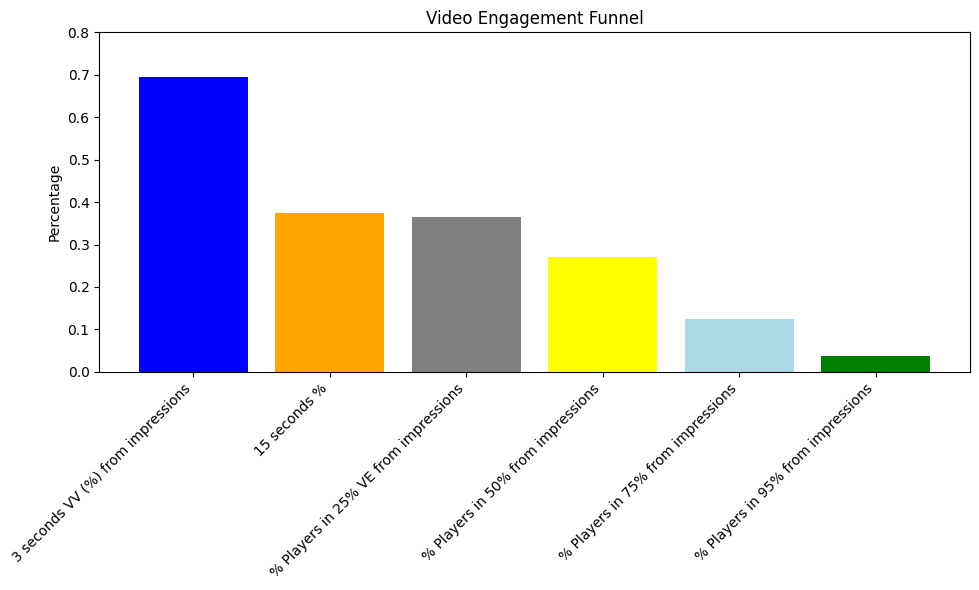


Funnel Analysis
Video Engagement Metrics
Initial engagement is strong at 69.5% for 3-second views
Sharp drop to 37.5% at 15 seconds
Further decline to 27% at 50% video duration
Only 3.8% of viewers reach the 95% mark
Target Audience Profile
Adults 45+ concerned about muscle loss
Health-conscious individuals interested in anti-aging
People experiencing fatigue or reduced strength
Fitness-minded individuals looking for supplement alternatives
Suggested Funnel Improvements
Content Structure
Compress key benefits into first 15 seconds
Add progress indicators throughout video
Include visual demonstrations of before/after results
Place testimonials strategically before major drop-off points
Engagement Tactics
Insert pattern interrupts at 25% mark where attention drops
Add interactive elements or questions at key retention points
Use visual transitions between key messages
Include clear call-to-actions at 15-second mark
5-Second Hook Suggestions
"Losing muscle after 30? This Japanese protein discovery shocked scientists..."
"83% of protein supplements fail - except this one amino acid trick..."
"See how this 74-year-old reversed decades of muscle loss in weeks..."
"The hidden reason your muscles are shrinking (it's not your age)..."
"Why some seniors have stronger muscles than 40-year-olds..."
Each hook directly addresses the product's unique selling proposition while maintaining high initial engagement shown in the funnel data.